In [1]:
import numpy as np
from numpy.linalg import inv
from numpy import linalg as LA
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import seaborn as sns

In [2]:
# Vole network

Edges=[[1418, 1437], [1418, 1433], [1418, 1438], [1419, 1345], [1439, 1440], [1439, 1438], [1439, 1441], [1442, 1395], [1442, 1443], [1442, 1444], [1442, 1445], [1442, 1386], [1442, 1249], [1446, 1447], [1446, 1448], [1446, 1436], [1446, 1449], [1446, 1450], [1446, 1451], [1452, 1433], [1445, 1453], [1445, 1230], [1445, 1385], [1454, 1435], [1454, 1370], [1454, 1455], [1454, 1429], [1440, 1453], [1440, 1438], [1440, 1345], [1440, 1441], [1345, 1453], [1421, 1447], [1421, 1256], [1449, 1447], [1449, 1448], [1449, 1436], [1449, 1450], [1449, 1451], [1370, 1435], [1370, 1230], [1370, 1429], [1370, 1455], [1230, 1430], [1230, 1385], [1430, 1435], [1430, 1412], [1430, 1385], [1451, 1447], [1451, 1365], [1451, 1448], [1451, 1436], [1451, 1256], [1451, 1450], [1397, 1365], [1397, 1389], [1397, 1436], [1397, 1256], [1397, 1367], [1443, 1395], [1365, 1389], [1365, 1256], [1365, 1367], [1444, 1386], [1438, 1456], [1438, 1441], [1438, 1433], [1385, 1453], [1367, 1389], [1367, 1436], [1367, 1256], [1367, 1457], [1458, 1354], [1458, 1437], [1458, 1459], [1453, 1456], [1453, 1354], [1456, 1433], [1456, 1354], [1460, 1412], [1450, 1447], [1450, 1448], [1450, 1436], [1437, 1354], [1437, 1459], [1461, 1249], [1447, 1448], [1447, 1436], [1447, 1256], [1395, 1249], [1457, 1358], [1457, 1389], [1448, 1436], [1354, 1459], [1389, 1358], [1389, 1462], [1389, 1256], [1389, 1259], [1259, 1462], [1412, 1415], [1358, 1415], [1429, 1435], [1429, 1455], [1436, 1256], [1435, 1455]]

In [3]:
# Edges is the undirected edge array. Total_Edges is the directed edges array.

Total_Edges=[]

for i in range(0,2*len(Edges)):
    if i<len(Edges):
        Total_Edges.append(Edges[i])
    else:
        Total_Edges.append([Edges[i-len(Edges)][1],Edges[i-len(Edges)][0]])


Empty=np.zeros((len(Total_Edges), len(Total_Edges)))
# Find the adjacent matrix A
def A(a,b):
    for i in range(0, len(Total_Edges)):
        for j in range(0, len(Total_Edges)):
            if Total_Edges[i][1]==Total_Edges[j][0]:
                if Total_Edges[i][0]==Total_Edges[j][1]:
                    Empty[i,j] = a
                elif [Total_Edges[i][0], Total_Edges[j][1]] in Total_Edges:
                    Empty[i,j] = b
                else:
                    Empty[i,j] = 1
    return Empty

# find the diagonal matrix D
def D_inverse(a,b):
    D=np.sum(A(a,b), axis=1)
    D=np.diag(D)
    D_inverse=inv(D)
    return D_inverse

# find transition matrix P
def P(a,b):
    P=np.transpose(np.dot(D_inverse(a,b), A(a,b)))
    return P

In [4]:
Coarse_Domain=np.linspace(0.01, 2.01, num=50)

Heat_Matrix=np.zeros((len(Coarse_Domain), len(Coarse_Domain)))

for i in range(0,len(Coarse_Domain)):
    for j in range(0,len(Coarse_Domain)):
        w= LA.eigvals(P(Coarse_Domain[i],Coarse_Domain[j]))
        vector=abs(w)
        vector.sort()         
        Heat_Matrix[len(Coarse_Domain)-j-1][i]=1-vector[len(vector)-2]

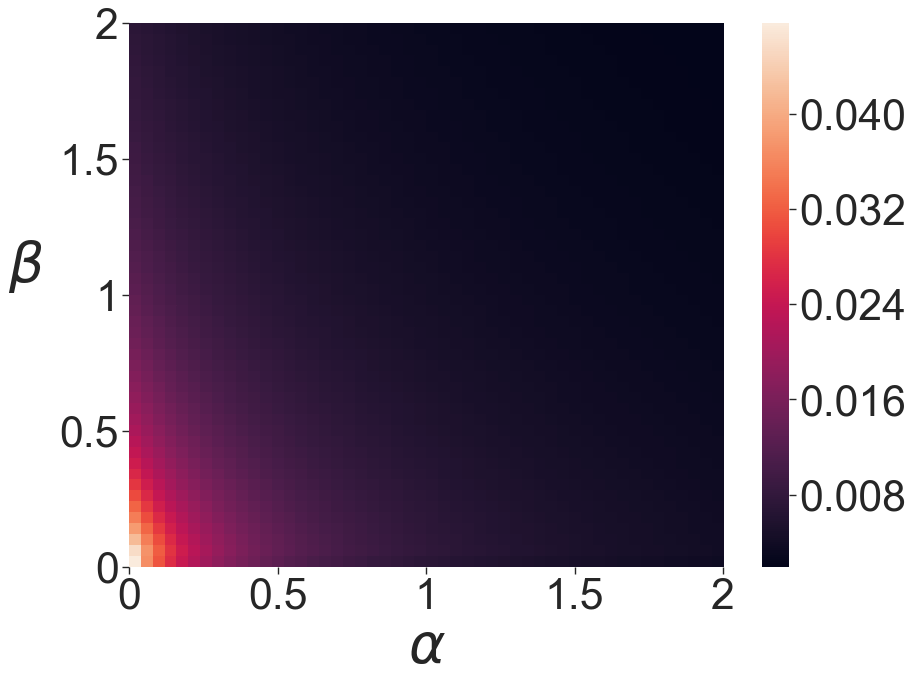

In [5]:
import matplotlib.ticker as ticker

figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')
sns.set(font_scale=3.5)


xticks=[-0.5,0,0.5,1,1.5,2]
yticks=[2.5,2,1.5,1,0.5,0]

ax = sns.heatmap(Heat_Matrix, xticklabels=xticks, yticklabels=yticks)
ax.tick_params(left=True, bottom=True)

plt.xlabel("$\it{\u03B1}$", labelpad=5, fontsize=50)
plt.ylabel("$\it{\u03B2}$", labelpad=30, fontsize=50, rotation=0)
plt.xticks(rotation=0) 
plt.yticks(rotation=0) 


ax.xaxis.set_major_locator(ticker.MultipleLocator(12.47))
ax.yaxis.set_major_locator(ticker.MultipleLocator(12.5))
plt.savefig('GAP',dpi=300, bbox_inches = "tight")
plt.show()